### SINDy

In [1]:
import numpy as np
import scipy as sp
import sympy as sym
import pandas as pd

from my_attractors import *

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading the time series

X = np.load('lorenz63_sim_data_e3_2.npy')
X.shape

(10000, 3)

In [3]:
# Creating Feature Matrix

In [4]:
x,y,z,x2,y2,z2,xy,xz,yz = sym.symbols("x,y,z,x2,y2,z2,xy,xz,yz")
R = pd.DataFrame(columns = [x,y,z,x2,y2,z2,xy,xz,yz])

In [5]:
R[x] = X[1:,0]
R[y] = X[1:,1]
R[z] = X[1:,2]
R[xy] = R[x]*R[y]
R[xz] = R[x]*R[z]
R[yz] = R[y]*R[z]
R[x2] = R[x]**2
R[y2] = R[y]**2
R[z2] = R[z]**2
R

,x,y,z,x2,y2,z2,xy,xz,yz
0,-14.166209,-20.908255,25.987332,200.681488,437.155107,675.341420,296.190712,-368.141985,-543.349750
1,-14.299821,-20.917235,26.442861,204.484871,437.530710,699.224895,299.112706,-378.128170,-553.111530
2,-14.430839,-20.913548,26.901563,208.249108,437.376476,723.694116,301.800035,-388.212125,-562.607129
3,-14.559061,-20.896887,27.362941,211.966262,436.679901,748.730528,304.239061,-398.378729,-571.800291
4,-14.684283,-20.866969,27.826470,215.628180,435.430377,774.312437,306.416481,-408.611774,-580.654076
...,...,...,...,...,...,...,...,...,...
9994,-10.806580,-2.972880,37.194833,116.782169,8.838013,1383.455596,32.126662,-401.948934,-110.575762
9995,-10.649450,-2.771302,37.058440,113.410777,7.680116,1373.328011,29.512843,-394.651995,-102.700136
9996,-10.491501,-2.575927,36.917686,110.071590,6.635402,1362.915557,27.025345,-387.321936,-95.097283
9997,-10.332873,-2.386757,36.772843,106.768256,5.696610,1352.242004,24.662057,-379.969104,-87.767846


In [6]:
# Derivatinve Approximation
Y = X[1:,] - X[:-1,]
Y.shape

(9999, 3)

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.Ridge(alpha = 1e-8)

In [9]:
reg.fit(R,Y)

,alpha,1e-08
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [10]:
dT = 0.002
W_out = reg.coef_  / dT
W_out

array([[-1.03859412e+01,  1.01138557e+01, -1.94273346e-05,
        -2.79503863e-06,  5.95030847e-07,  7.25847632e-07,
         1.12568379e-06,  1.01984672e-02, -1.47377144e-04],
       [ 2.85034118e+01, -1.46420000e+00,  3.00086269e-03,
         4.27999309e-04, -8.65241871e-05, -1.11112814e-04,
        -1.78697899e-04, -1.01952737e+00,  2.19689731e-02],
       [ 1.13205311e-03, -1.37264853e-04, -2.80809309e+00,
        -4.47493908e-03, -2.46884238e-02,  3.72942811e-03,
         1.03603860e+00, -1.37211371e-04,  4.80991747e-05]])

In [11]:
W = pd.DataFrame(W_out,columns = list(R.columns))
W

,x,y,z,x2,y2,z2,xy,xz,yz
0,-10.385941,10.113856,-0.000019,-0.000003,5.950308e-07,7.258476e-07,0.000001,0.010198,-0.000147
1,28.503412,-1.464200,0.003001,0.000428,-8.652419e-05,-1.111128e-04,-0.000179,-1.019527,0.021969
2,0.001132,-0.000137,-2.808093,-0.004475,-2.468842e-02,3.729428e-03,1.036039,-0.000137,0.000048


#### Lorenz System
$\dot{x} = \sigma (y - x)$  
$\dot{y} = x(\rho - z) - y$  
$\dot{z} = xy - \beta z$

$\sigma = 10, \rho = 28, \beta = 8/3$

In [12]:
# Sigma -> Negative Coeff of x = Coeff of y in dx
sigma = -W[x][0]
#rho ->  Coeff of x dy
rho = W[x][1]
#beta = -> Negative Coeff of z
beta = W[z][2]

sigma,rho,beta

(np.float64(10.385941244530528),
 np.float64(28.50341178892826),
 np.float64(-2.8080930949827114))

In [14]:
# Recreate Time Series

In [62]:
N = 20_000
X_rec = np.zeros((N,3))
X_rec[0] = X[0]
for i in range(N-1):
    ri = np.zeros(9)
    ri[:3] = X_rec[i]
    #print(ri)
    ri[3:6] = ri[:3]**2
    ri[6] = ri[0] * ri[1]
    ri[7] = ri[0] * ri[2]
    ri[8] = ri[1] * ri[2]
    #print(ri)
    X_rec[i+1] = X_rec[i] + (W_out @ ri.T)*0.002
    #print(X_rec[i])
X_rec.shape

(20000, 3)

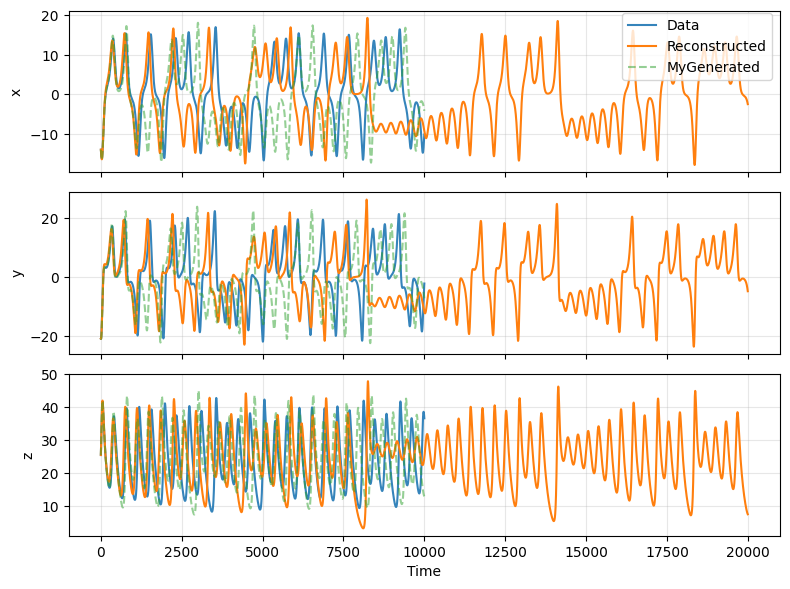

In [63]:
f = plotTimeSeries([
    [X,{"label":"Data","alpha":0.9}],
    [X_rec,{"label":"Reconstructed","alpha":1}],
    [lorenz(xi = [-14.030, -20.88,  25.5],sigma = 10.3859, rho = 28.5034,beta = 2.808,dt = 0.002),{"label":"MyGenerated","ls":"--","alpha":0.5}]])